# Лабораторная работа №1

##### Светлаковой Ульяны 4-ПМИ 2 подгр.

## Прямое преобразование радона

<img src="images/radon.png" style="width:60%;">


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from skimage.transform import radon, iradon
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [6]:
# Функция для добавления отступов чтобы всё изображение было видно
def pad_image_to_circle(image):
    h, w = image.shape
    size = int(np.sqrt(h**2 + w**2))  # Диаметр вписываемого круга
    
    # Создаём чёрный квадрат большего размера
    padded_image = np.zeros((size, size), dtype=np.uint8)
    
    # Вставляем исходное изображение в центр
    y_offset = (size - h) // 2
    x_offset = (size - w) // 2
    padded_image[y_offset:y_offset + h, x_offset:x_offset + w] = image
    
    return padded_image

Загрузим изображение и преобразуем его в ч/б, чтобы каждый пиксель содержал число от 0 до 1, <br> где 0 - черный, 1 - белый и значения между ними - градации серого.

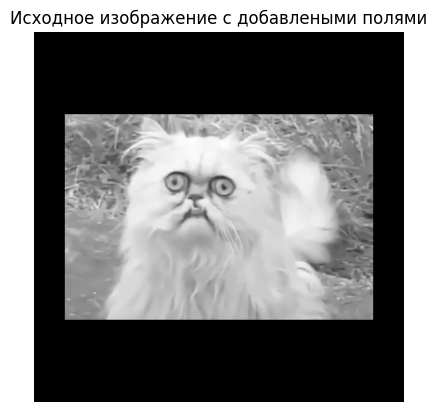

In [7]:
# Загрузка изображения
image = cv2.imread('images/cat.jpg', cv2.IMREAD_GRAYSCALE)
if image is None:
    raise ValueError("Ошибка: изображение не загружено")

# Делаем изображение полностью вписываемым в круг
image = pad_image_to_circle(image)
plt.imshow(image, cmap='gray')
plt.title('Исходное изображение с добавлеными полями')
plt.axis('off') 
plt.show()

Суть преобразования радона: как и в случае МРТ мы будем делать круговой обход вокруг изображения. <p> Есть две полосы - можно представить,что одна отдает сигнал (в данном случае сверху), другая принимает (снизу). Данный "сигнал" будет исходить по всей ширине прямой сверху, т.е. ширине изображения и складывать значения всех пикселей. В итоге, пройдя по всей картинке, мы получим массив таких сумм. В математическом плане мы получаем интеграл от значений пикселей на прямой, т.е. геометрический смысл преобразования Радона — это интеграл от функции вдоль прямой, 
перпендикулярной <br> вектору ${\vec {n}}=(\cos \alpha ,\sin \alpha )$ и проходящей на расстоянии $s$ (измеренного вдоль вектора ${\vec {n}}$, с соответствующим знаком) от начала координат.

<div style="display: flex; justify-content: start;">
   <img src="images/радон_схемы.png" style="width:25%;">
<img src="images/радон_схемы (1).png" style="width:25%;">
</div>


Затем эти полосы мы поворачиваем на некоторый угол $\alpha$, и опять считаем значения. В итоге получаем двумерную матрицу - синограмму, строки которой соответствуют градусам, столбцы - расстоянию от центра прямой до проекции, а каждое значение в матрице - результат интегрирования (суммирования пикселей).

<div style="display: flex; justify-content: start;">
   <img src="images/радон_схемы (2).png" style="width:25%;">
<img src="images/радон_схемы (3).png" style="width:25%;">
</div>

Затем мы делаем обратное преобразование, применяя к нашей синограмме формулу обратного преобразования радона, чтобы восстановить изображение.

<img src="images/iradon.png" style="width:60%;">

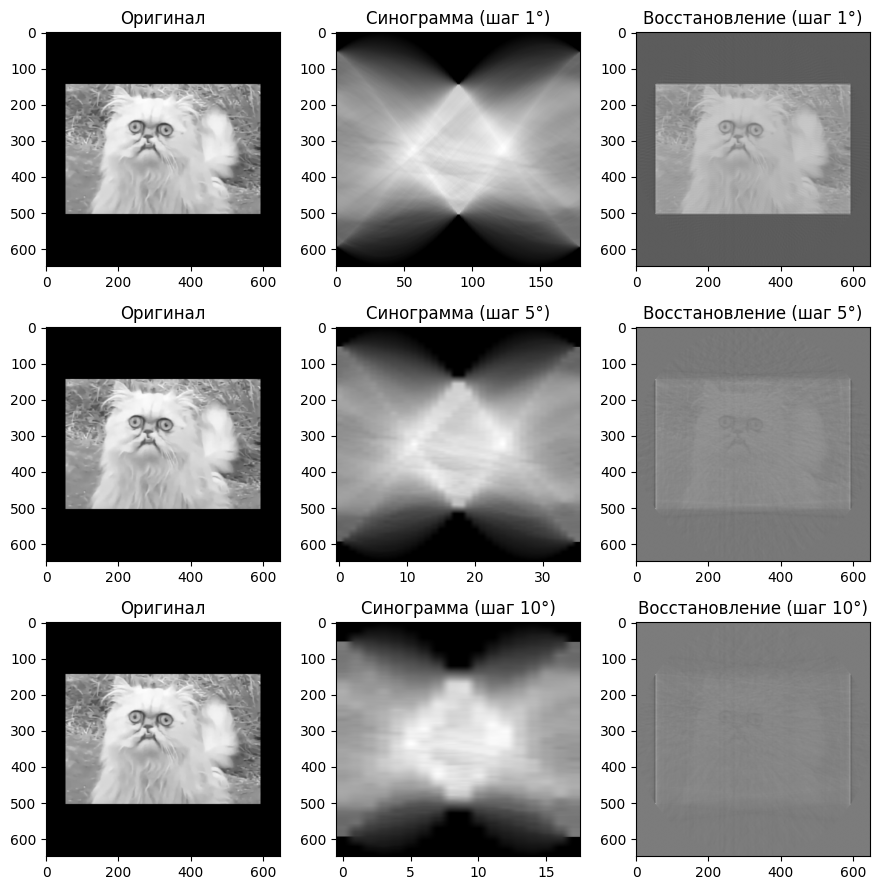

In [8]:
# Разные шаги углов
steps_list = [1, 5, 10]
angle = 180  # общий угол поворота проекций

fig, axes = plt.subplots(len(steps_list), 3, figsize=(9, 9))

for i, step in enumerate(steps_list):
    theta = np.linspace(0, angle, int(angle / step))  # Генерация углов с разным шагом
    R = radon(image, theta)  # Прямое преобразование радона: проецирует изображение под разными углами и формирует синограмму - график интенсивности проекций
    IR = iradon(R, theta)  # Обратное преобразование

    # Визуализация
    axes[i, 0].imshow(image, cmap='gray')
    axes[i, 0].set_title(f'Оригинал')

    axes[i, 1].imshow(R, cmap='gray', aspect='auto')
    axes[i, 1].set_title(f'Синограмма (шаг {step}°)')

    axes[i, 2].imshow(IR, cmap='gray')
    axes[i, 2].set_title(f'Восстановление (шаг {step}°)')

plt.tight_layout()
plt.show()

   <img src="images/question1.png" style="width:60%;">


<img src="images/question2.png" style="width:60%;">

<img src="images/question3.png" style="width:60%;">